# import packages

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()

# load the data 

In [106]:
df=pd.read_csv('kc_house_data.csv')

In [107]:
df.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,20141013T000000,221900.0,3,1.00,1180,5650,1.0,0,0,...,7,1180.0,0,1955,0,98178,47.5112,-122.257,1340,5650
1,6414100192,20141209T000000,538000.0,3,2.25,2570,7242,2.0,0,0,...,7,2170.0,400,1951,1991,98125,47.7210,-122.319,1690,7639
2,5631500400,20150225T000000,180000.0,2,1.00,770,10000,1.0,0,0,...,6,770.0,0,1933,0,98028,47.7379,-122.233,2720,8062
3,2487200875,20141209T000000,604000.0,4,3.00,1960,5000,1.0,0,0,...,7,1050.0,910,1965,0,98136,47.5208,-122.393,1360,5000
4,1954400510,20150218T000000,510000.0,3,2.00,1680,8080,1.0,0,0,...,8,1680.0,0,1987,0,98074,47.6168,-122.045,1800,7503


# Independent and dependent variables

In [27]:
df['age_of_building']=[2015-df.yr_built[i] for i in range(len(df))]

In [46]:
inputs=df.sqft_living
target=df.price

In [47]:
inputs.isnull().sum()

0

In [48]:
target.isnull().sum()

0

# Distributions

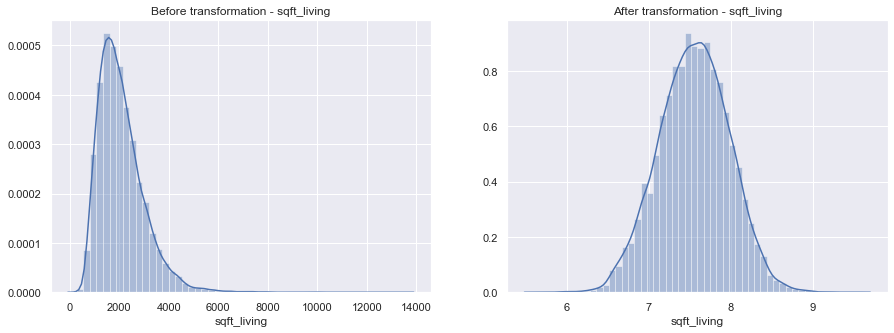

In [50]:
# independent variable - sqft_living
plt.figure(figsize=(15,5))
plt.subplot(1,2,1)
sns.distplot(inputs)
plt.title('Before transformation - sqft_living')
plt.subplot(1,2,2)
sns.distplot(np.log(inputs))
plt.title('After transformation - sqft_living')
plt.show()

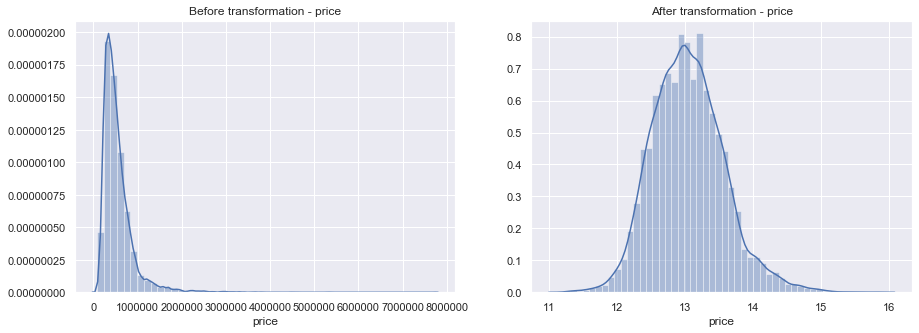

In [45]:
# dependent variable - price
plt.figure(figsize=(15,5))
plt.subplot(1,2,1)
sns.distplot(target)
plt.title('Before transformation - price')
plt.subplot(1,2,2)
sns.distplot(np.log(target))
plt.title('After transformation - price')
plt.show()

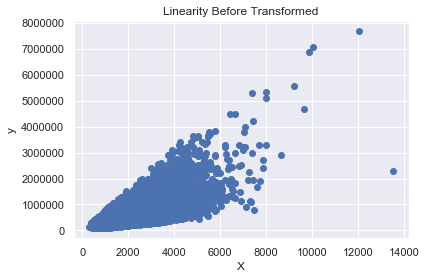

In [110]:
# Linearity before transformed 
plt.scatter(inputs,target)
plt.title('Linearity Before Transformed')
plt.xlabel('X')
plt.ylabel('y')
plt.show()

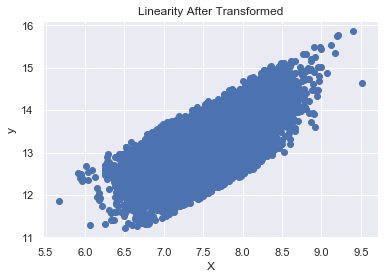

In [111]:
# Linearity after transformed 
plt.scatter(np.log(inputs),np.log(target))
plt.title('Linearity After Transformed')
plt.xlabel('X')
plt.ylabel('y')
plt.show()

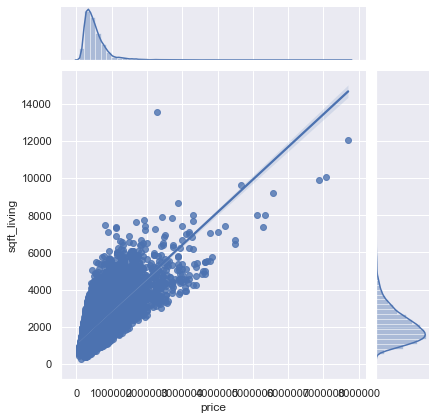

In [128]:
# using seaborn - before transformation
sns.jointplot("price", "sqft_living", data=df, kind="reg")

<Figure size 1080x576 with 0 Axes>

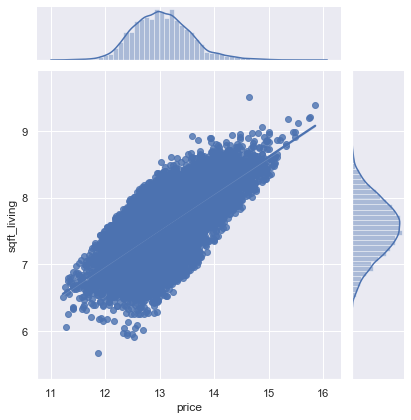

In [130]:
# using seaborn - after transformation
plt.figure(figsize=(15,8))
sns.jointplot(np.log(df.price), np.log(df.sqft_living), kind="reg")

In [53]:
# declare x and y
x=np.log(inputs)
y=np.log(target)

# Linear Regression

## Sklearn

In [57]:
# In order to feed x to sklearn, it should be a 2D array (a matrix)
X = x.values.reshape(-1,1)

In [58]:
# import package
from sklearn.linear_model import LinearRegression

In [59]:
# fit the model 
reg = LinearRegression()
reg.fit(X,y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [100]:
# r_squared
reg.score(X,y)

0.4555070643157701

In [101]:
#intercept
reg.intercept_

6.729916156829865

In [102]:
# coefficient
reg.coef_

array([0.83677095])

In [84]:
# since we transformed data then let us transfom it back 
# prediction
y_hat=reg.predict(X)

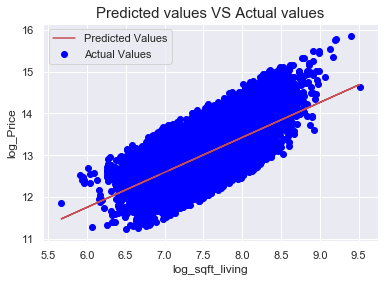

In [95]:
# plot predicted values and Actual values
plt.plot(x,y_hat,label='Predicted Values',color='r')
plt.scatter(x,y,label='Actual Values',color='blue')
plt.title('Predicted values VS Actual values',fontsize=15)
plt.xlabel('log_sqft_living')
plt.ylabel('log_Price')
plt.legend()
plt.show()

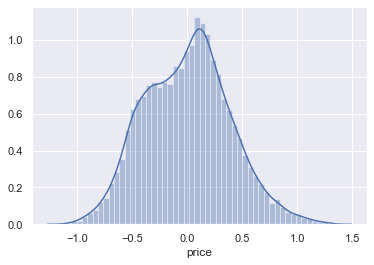

In [109]:
# residual distribution
sns.distplot((y-y_hat))

## Statsmodels

In [103]:
# import package
import statsmodels.api as sm 

In [104]:
#fit the model
X=sm.add_constant(x)
results=sm.OLS(y,X).fit()

In [105]:
results.summary() # obtian summary table

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.456
Model:                            OLS   Adj. R-squared:                  0.455
Method:                 Least Squares   F-statistic:                 1.808e+04
Date:                Sun, 05 Jul 2020   Prob (F-statistic):               0.00
Time:                        13:43:02   Log-Likelihood:                -10240.
No. Observations:               21613   AIC:                         2.048e+04
Df Residuals:                   21611   BIC:                         2.050e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
===============================================================================
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
const           6.7299      0.047    143.001      0.000       6.638       6.822
sqft_living     0.8368      0.006    134.459      0.000       0.825       0.849
==============================================================================
Omnibus:                      123.344   Durbin-Watson:                   1.978
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              113.759
Skew:                           0.142   Prob(JB):                     1.98e-25
Kurtosis:                       2.787   Cond. No.                         137.
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [116]:
# prediction
y_hat1=6.7299+0.8368*x

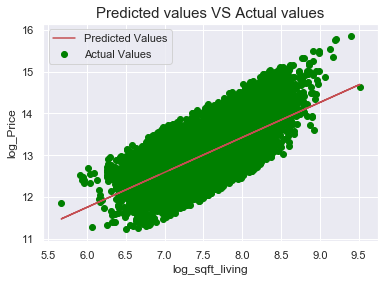

In [117]:
# plot predicted values and Actual values
plt.plot(x,y_hat1,label='Predicted Values',color='r')
plt.scatter(x,y,label='Actual Values',color='green')
plt.title('Predicted values VS Actual values',fontsize=15)
plt.xlabel('log_sqft_living')
plt.ylabel('log_Price')
plt.legend()
plt.show()

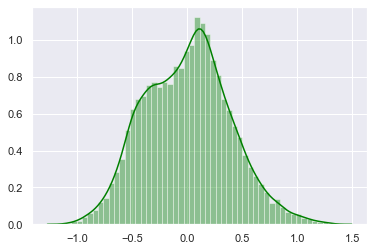

In [120]:
# residual distribution
sns.distplot((y-y_hat1),color='green')